In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Part-1
# HOW TO CLEAN DATA WITH PYTHON

In [2]:
path = r"F:\PIAIC-Cources\PIAIC-B9-AI\Assignment\states?.csv"

In [3]:
all_csv_files = (pd.read_csv(files, index_col=0, header=0) for files in glob.glob(path))
us_census = pd.concat(all_csv_files, axis=0, ignore_index=True)
us_census.drop_duplicates(inplace=True)

In [4]:
# getting columns
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [5]:
# getting dataTypes
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [6]:
avg_income = us_census["Income"].str.replace("$","").astype(float, errors="raise")

In [7]:
# Spliting GenderPop column into Women and Men columns
us_census[["Men","Women"]] = us_census["GenderPop"].str.split("_", expand=True)

In [8]:
us_census["Women"] = us_census["Women"].str.replace("F","")
us_census["Men"] = us_census["Men"].str.replace("M","")


In [9]:
women_data = pd.to_numeric(us_census["Women"])
men_data = pd.to_numeric(us_census["Men"]).astype(float)


In [10]:
womens = women_data.fillna(us_census.TotalPop - men_data) 

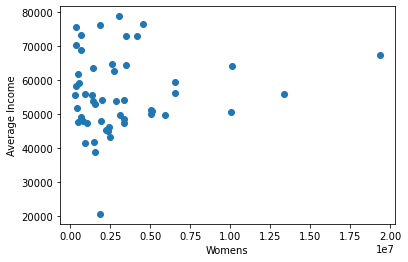

In [11]:
# Plotting the graph
plt.xlabel("Womens")
plt.ylabel("Average Income")
plt.scatter(womens, avg_income)
plt.show()

In [12]:
white = pd.to_numeric(us_census["White"].str.replace("%",""))
black = pd.to_numeric(us_census["Black"].str.replace("%",""))
native = pd.to_numeric(us_census["Native"].str.replace("%",""))
asian = pd.to_numeric(us_census["Asian"].str.replace("%",""))
pacific = pd.to_numeric(us_census["Pacific"].str.replace("%",""))


Text(0.5, 1.0, 'Black')

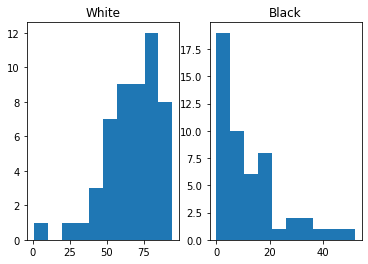

In [13]:
# plotting histogram
fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(white)
ax1.set_title('White')
ax2.hist(black)
ax2.set_title('Black')


Text(0.5, 1.0, 'Asian')

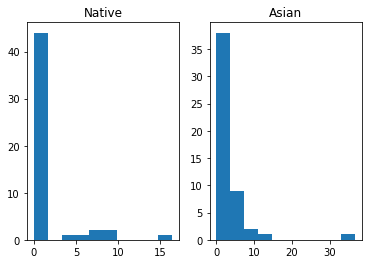

In [14]:
fig2, (ax3, ax4) = plt.subplots(1, 2)
ax3.hist(native)
ax3.set_title('Native')
ax4.hist(asian)
ax4.set_title('Asian')


c:\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Pacific')

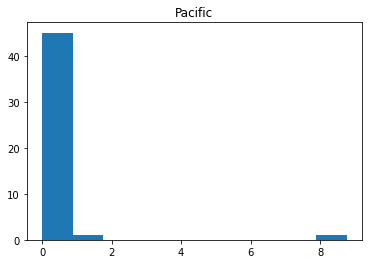

In [15]:
fig3, (ax5) = plt.subplots(1, 1)
ax5.hist(pacific)
ax5.set_title('Pacific')

## Part-2
# LEARN DATA ANALYSIS WITH PANDAS

In [16]:
path = r"F:\PIAIC-Cources\PIAIC-B9-AI\Assignment\inventory.csv"
inventory =  pd.read_csv(path)

In [17]:
inventory[:10]

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [18]:
staten_island = inventory[:10]

In [19]:
product_request = staten_island["product_description"]

In [20]:
seed_request = np.logical_and(inventory["location"]=="Brooklyn" , inventory["product_type"]=="seeds")

In [21]:
inventory["in_stock"] = np.where(inventory["quantity"] > 0, True, False)

In [22]:
inventory["total_value"] = inventory["price"] * inventory["quantity"]

In [23]:
combine_lambda = lambda row: '{} - {}'.format(row.product_type , row.product_description)

In [24]:
inventory["full_description"] = inventory.apply(combine_lambda, axis=1, result_type="expand")